
### Source code for this blog post 
[Here](https://github.com/Xianzhiwang1/CS0451-page-site/tree/main/posts/) is a link to the source code for this Kernel Logistic Regression blog post.

### Reference for this blog post
[Here](https://middlebury-csci-0451.github.io/CSCI-0451/assignments/blog-posts/blog-post-kernel-logistic.html) is a link to the main reference we are using when creating this blog post.

# Introduction.
In this blog post I am going to discuss kernel logistic regression for binary classification. Recall that in previous blog posts, the visualization of the data set with $2$ features looks graphically like it could be reasonably separated by a line. With more features, we could no longer visualize in $2$ dimension, but the idea is the same, we use linear separation, like a hyperplane. However, what if the data is dominated by other patterns that are not suitable for a straight line (or a straight plane if you will) separation? Hence, we need to use some other methods, and hence let us use kernel logistic regression.



Recall the empirical risk minimization problem in previous blog posts, which is finding the weight vector `w` that minimize the loss function $L(w)$.
$$ \hat{w} = \arg \min_{w} L(w), $$ 
where the loss function $L(w)$ is of the following form:
$$ L(w) = \frac{1}{n} \sum_{i=1}^{n} \ell( \langle w, x_i \rangle, y_i ), $$
and $\ell (\hat{y}, y ) $ is the logistic loss from the previous blog post. However, previously, we only studied *linear decision boundaries*, and now we want to study nonlinear patterns. Hence, instead of feature vector $x_i$, we need modified feature vector $\kappa(x_i)$ that does the following:
$$
\kappa(x_i) = 
\begin{bmatrix}
&k(x_1, x_i)\\
&k(x_2, x_i)\\
&\vdots\\
&k(x_n, x_i)\\
\end{bmatrix}
$$
where $k: \mathbb{R}^2 \rightarrow \mathbb{R}$ is called a *kernel function*. Hence our empirical risk function (loss function) is now
$$ L_k(w) = \frac{1}{n} \sum_{i=1}^{n} \ell( \langle w, \kappa(x_i) \rangle, y_i ), $$
where the subscript $k$ in $L_k(w)$ indicates we are using a kernel function $k$.

In [1]:

%load_ext autoreload
%autoreload 2

First, let's import some libraries, and let's create an artificial data set that has nonlinear patterns.

In [109]:

# from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons, make_circles, make_blobs, make_biclusters, make_classification
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (3,3)
plt.rcParams['figure.dpi'] = 117 
plt.rcParams['savefig.dpi'] = 78 
import numpy as np
np.random.seed(42)
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
np.seterr(all="ignore")


{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

First, we use `make_moons` from `sklearn.datasets` to generate some artificial data. How to deal with the nonlinear pattern we see in the plot below? it seems a linear separator like a straight line will not do a satisfactory job here. Hence, we need *kernel logistic regression*, which we implemented in `kernel_logistic.py`, and we are going to import it into this notebook. 

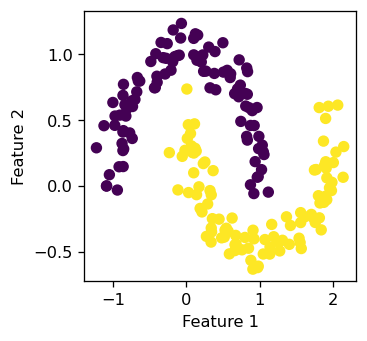

In [43]:
from sklearn.metrics.pairwise import rbf_kernel
from kernel_logistic import KLR 
X, y = make_moons(200, shuffle = True, noise = 0.1)
plt.scatter(X[:,0], X[:,1], c = y)
labels = plt.gca().set(xlabel = "Feature 1", ylabel = "Feature 2")

After seeing this data set, we would guess that a linear classification would not do a great job at classifying the patterns we see here with our eyes. Hence, without further ado, let's see how our `KLR`, kernel logistic regression handle this binary classification problem. 

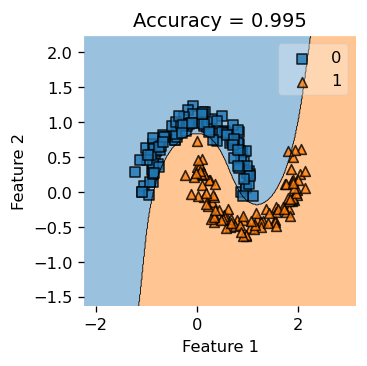

In [45]:
from kernel_logistic import KLR 
KLR = KLR(rbf_kernel, gamma = 1.8)
KLR.fit(X, y)
plot_decision_regions(X, y, clf = KLR)
mypredict = KLR.predict(X)
title = plt.gca().set(title = f"Accuracy = {(mypredict == y).mean()}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

Not bad at all! We see that `KLR` did a decent job fitting the non-linear decision boundary, and achieved an accuracy score about $0.99$. The data is quite neatly separated by this curvy decision boundary our `KLR` generated.   

# Choosing `gamma` and Try on a tiny example 
To start us off, we manually create a tiny data set, and we call the `fit` function that we implemented in the source code (link at the start of the blog). We start with a big value for gamma: `gamma = 100`, and in this tiny data set, we could see clearly what's going on with the decision boundary, and a tiny data set could also help with debugging purposes. 

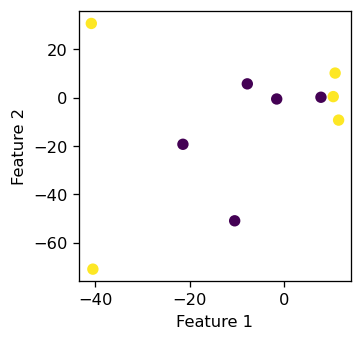

In [46]:
XX = np.array([
[-40.84739307, 30.71154296],
 [ 11.46814927, -9.28580296],
 [ -40.5192833,   -70.94984582],
 [ 10.73327397,  10.17310931],
 [ 10.33197143,  0.43375035],

 [ -1.62726102, -0.54736954],
[-7.84739307, 5.71154296],
 [ -21.46814927, -19.28580296],
 [ -10.5192833,   -50.94984582],
 [ 7.73327397,  0.17310931],
])
yy = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
plt.scatter(XX[:,0], XX[:,1], c = yy)
labels = plt.gca().set(xlabel = "Feature 1", ylabel = "Feature 2")

It seems that those $10$ data points does not display a linear pattern, which is what we want. Now we create an instance of the `KLR` class with `gamma = 100` and test our `fit` function to see if it could classify these $10$ points with $100 \%$ accuracy.

In [47]:
from kernel_logistic import KLR 
KLR = KLR(rbf_kernel, gamma = 100)
KLR.fit(XX, yy)

We see that our classifier makes a little circular boundary around each orange triangular data points, while the rest of the region is all classified as blue for the blue squares. `gamma` essentially controls how "wiggly" our decision boundary is allowed to be. If `gamma` is small, our decision boundary would be less curvy, and if `gamma` is too big, we tend to overfit and produce the picture below.

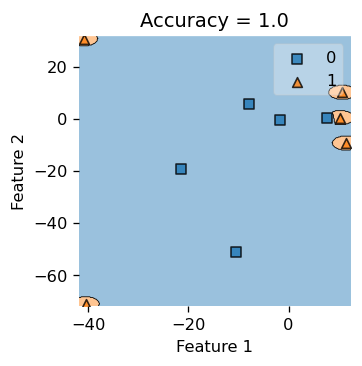

In [48]:
plot_decision_regions(XX, yy, clf = KLR)
mypredict = KLR.predict(XX)
title = plt.gca().set(title = f"Accuracy = {(mypredict == yy).mean()}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

Also, we do achieve $100\%$ accuracy here, since our accuracy is $1.0$. But if you insist on pop open the hood and inspect what's underneath, let's print out the actual label `yy` and our predicted labels, and see that they are indeed the same.

In [33]:
print(f"Actual labels: {yy}")
print(f"Predicted labels: {KLR.predict(XX)}")

Actual labels: [1 1 1 1 1 0 0 0 0 0]
Predicted labels: [1 1 1 1 1 0 0 0 0 0]


Now, with the same tiny data set, we use a very small gamma and see how the decision boundary would look like. Hence, let `gamma = 0.05`.

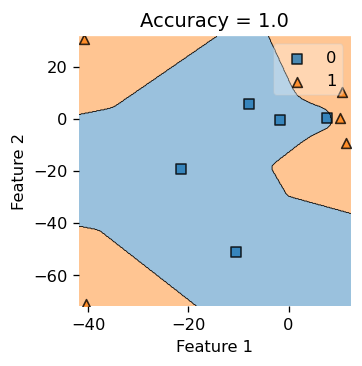

In [50]:
from kernel_logistic import KLR 
KLR = KLR(rbf_kernel, gamma = 0.05)
KLR.fit(XX, yy)
plot_decision_regions(XX, yy, clf = KLR)
mypredict = KLR.predict(XX)
title = plt.gca().set(title = f"Accuracy = {(mypredict == yy).mean()}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

we see that our decision boundary is less "smooth" and looks more "jagged", so choosing a good `gamma` would decide the right complexity for our decision boundary, hence the parameter `gamma` is quite important to this binary classification problem.

# Choosing different noise level and Try on a synthetic data set with `make_circles`
This time, we set the size of the data set to contain $200$ data points, and we call `mak_circle` to generate our data. We set `noise = 0.8`, so our data set is very noisy, and in the visualization below (the plot on the right), we see that we cannot really distinguish the circles by eye, so the data set is indeed very noisy and chaotic. 

In [94]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8,4)
X_cir, y_cir = make_circles(200, shuffle = True, noise = 0.8)

Let's set `gamma = 1.8` and train our model by calling the `.fit()` function.

In [86]:
from kernel_logistic import KLR 
KLR = KLR(rbf_kernel, gamma = 1.8)
KLR.fit(X_cir, y_cir)

Below, in the plot on the left, we see that with very noisy data, our Kernel Logistic Regression only scored $0.63$ in accuracy, and judging by looking at the picture, we feel that our classifier only did a slightly above average job at classifying the data points. Hence, noisy data does negatively affect the performace of our Kernel Logistic Regression.

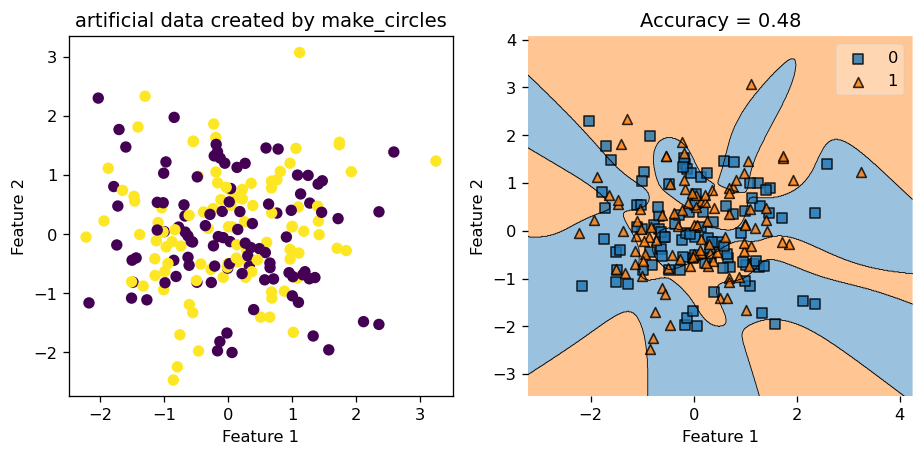

In [95]:
fig, axarr = plt.subplots(1,2)
axarr[0].scatter(X_cir[:,0], X_cir[:,1], c = y_cir)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = "artificial data created by make_circles")


axarr[1].plot()
plot_decision_regions(X_cir, y_cir, clf = KLR)
yourpredict = KLR.predict(X_cir)
axarr[1].set(title = f"Accuracy = {(yourpredict == y_cir).mean()}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")
plt.tight_layout()


Still, let's test our trained model on a fresh copy of synthetic data generated using `make_circles`.

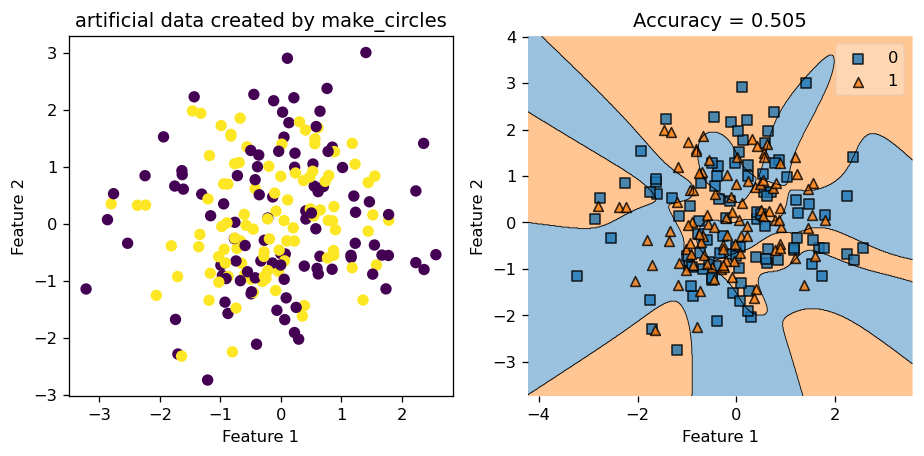

In [96]:
X_cir2, y_cir2 = make_circles(200, shuffle = True, noise = 0.8)
fig, axarr = plt.subplots(1,2)
axarr[0].scatter(X_cir2[:,0], X_cir2[:,1], c = y_cir2)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = "artificial data created by make_circles")


axarr[1].plot()
plot_decision_regions(X_cir2, y_cir2, clf = KLR)
yourpredict = KLR.predict(X_cir2)
axarr[1].set(title = f"Accuracy = {(yourpredict == y_cir2).mean()}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")
plt.tight_layout()

Now, we try with a data set with very little noise by setting `noise = 0.05`, and let the rest of the parameter stay the same. Hence, we keep `gamma = 1.8`, number of data points $200$, etc.

In [100]:
X_cir3, y_cir3 = make_circles(200, shuffle = True, noise = 0.05)

In [101]:
from kernel_logistic import KLR 
KLR2 = KLR(rbf_kernel, gamma = 1.8)
KLR2.fit(X_cir3, y_cir3)

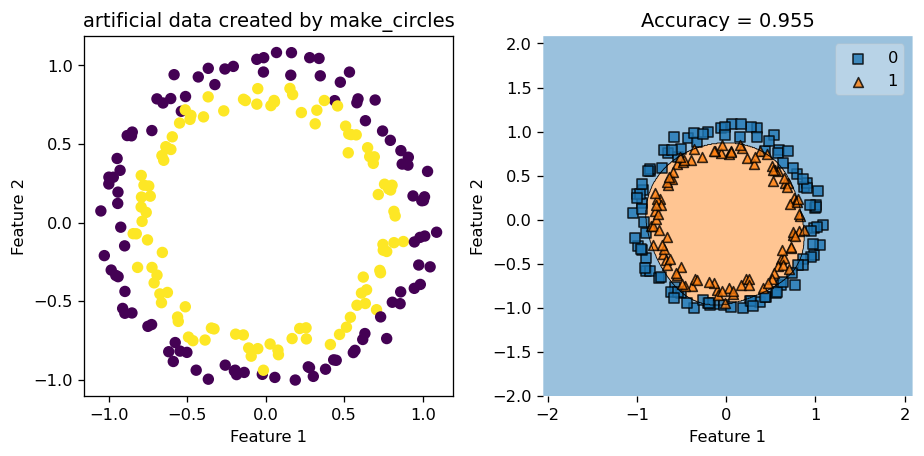

In [107]:

fig, axarr = plt.subplots(1,2)
axarr[0].scatter(X_cir3[:,0], X_cir3[:,1], c = y_cir3)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = "artificial data created by make_circles")


axarr[1].plot()
plot_decision_regions(X_cir3, y_cir3, clf = KLR2)
yourpredict = KLR2.predict(X_cir3)
axarr[1].set(title = f"Accuracy = {(yourpredict == y_cir3).mean()}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")
plt.tight_layout()

This time, since our data has pretty clear patterns, and has very little noise, our Kernel Logistic Regression did a great job at classifying the data points and engineering the decision boundary. We see that decision region plot on the right looks spot on, and the accuracy score is around $0.95$, which is pretty high compared to the score we had before when the data was noisy.  

### Try other problem geometries
let's start with a data set generated by `make_blobs` function, with a reasonable amount of standard deviations (which is a proxy for noise in this case) in it.

In [135]:
X, y = make_blobs(n_samples = 200, centers = 2, n_features = 2, cluster_std=3, random_state=42)

Let us set `gamma = 2.45` and see how well we do in this case.

In [125]:
from kernel_logistic import KLR
KLR3 = KLR(rbf_kernel, gamma = 2.45)
KLR3.fit(X, y)

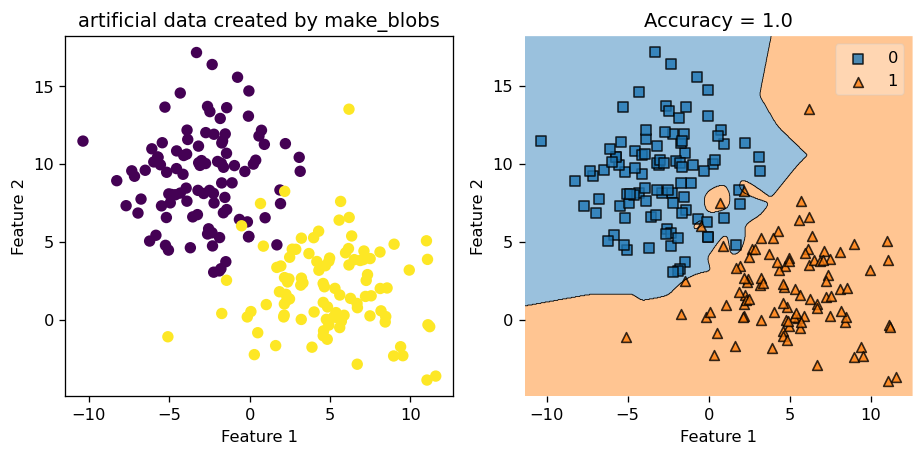

In [136]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8,4)
fig, axarr = plt.subplots(1,2)
axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = "artificial data created by make_blobs")


axarr[1].plot()
plot_decision_regions(X, y, clf = KLR3)
yourpredict = KLR3.predict(X)
axarr[1].set(title = f"Accuracy = {(yourpredict == y).mean()}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")
plt.tight_layout()



We see that we achieved a perfect accuracy score of $1.0$. We could also call the `.predict()` function to find out the predicted value and compare that to the actual value of `y`, and see that they indeed match up.

In [127]:
print(f"Actual labels: {y}")
print(f"Predicted labels: {KLR3.predict(X)}")

Actual labels: [1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0
 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1
 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1
 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0]
Predicted labels: [1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0
 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1
 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1
 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0]


In the next example, we use `make_classification` to make some sythetic data with $4$ features. Since we have more than $2$ features, we could only plot $2$ dimensions at a time to visualize how our classification performs. Let's generate the data set first. 

In [137]:
X_class, y_class = make_classification(n_samples = 200, 
                           n_classes = 2, 
                           n_redundant= 0,
                           n_informative= 2,
                           n_features = 4, 
                           n_clusters_per_class = 1, 
                           class_sep = 1.5,
                           random_state=42)

Now, we set `gamma = 2.45` and we train our Kernel Logistic Regression on this data set.

In [134]:
from kernel_logistic import KLR
KLR4 = KLR(rbf_kernel, gamma = 2.45)
KLR4.fit(X_class, y_class)

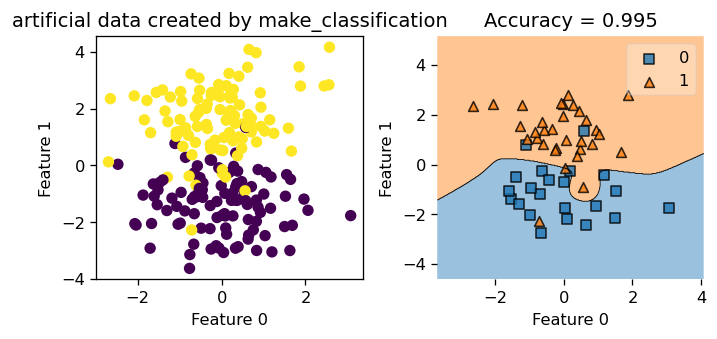

In [157]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (6,3)
value = 1 
width = 1 
KLR4.myprint(X_class, y_class, "make_classification", value, width)

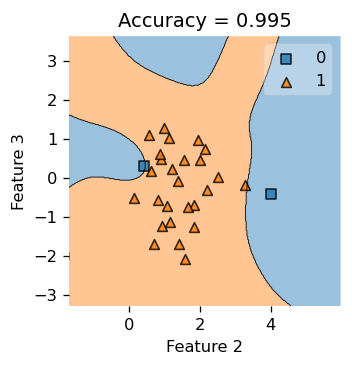

In [158]:
plt.rcParams["figure.figsize"] = (3,3)
plot_decision_regions(X_class, y_class, clf = KLR4, 
                    feature_index=[2,3],
                    filler_feature_values={0: value, 1: value},
                    filler_feature_ranges={0: width, 1: width})
yourpredict = KLR4.predict(X_class)
title = plt.gca().set(title = f"Accuracy = {(yourpredict == y_class).mean()}",
                xlabel = "Feature 2", 
                ylabel = "Feature 3")